In [169]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import tqdm as tqdm

In [170]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


# Data Loading

In [171]:
dataset = os.path.join(path,"data.csv")
df = pd.read_csv(dataset)

In [172]:
print(df.sample(3))

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
511   915664         B        14.81         14.70           94.66      680.7   
270  8910721         B        14.29         16.82           90.30      632.6   
436   908916         B        12.87         19.54           82.67      509.2   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
511          0.08472           0.05016         0.03416              0.02541   
270          0.06429           0.02675         0.00725              0.00625   
436          0.09136           0.07883         0.01797              0.02090   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
511  ...          17.58           101.70       760.2           0.11390   
270  ...          20.65            94.44       684.6           0.08567   
436  ...          24.38            95.14       626.9           0.12140   

     compactness_worst  concavity_worst  concave points_worst  sy

# Statistical Analysis of the Dataset

In [173]:
print(f"Shape of Dataset is {df.shape}")
df.describe()

Shape of Dataset is (569, 33)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# Data Cleaning & Data Pre-Processing

In [174]:
df.drop("id",inplace = True,axis =1)
df.drop("Unnamed: 32",inplace=True,axis=1)

In [175]:
print("CHECKING NULL VALUES\n")
print(df.isnull().sum())
print("\nCHECKING DUPLICATE VALUES\n")
print(df.duplicated())

CHECKING NULL VALUES

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

CHECKING DUPLICATE VALUES

0      False
1      False
2      False

In [176]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [177]:
new_diagnosis = []

for x in df['diagnosis']:
    if x=='M':
        new_diagnosis.append(1)
    
    else:
        new_diagnosis.append(0)  
        
df['diagnosis'] = new_diagnosis          

In [178]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

# Exploratory Data and Feature Distribution Analysis

Class Distribution

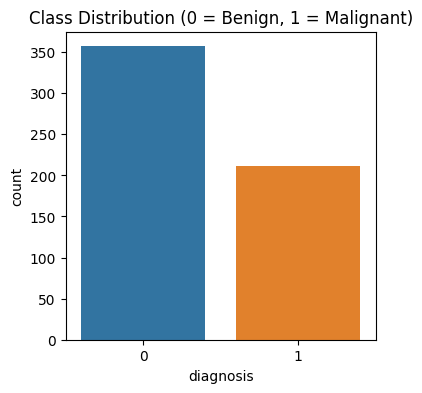

In [179]:
plt.figure(figsize=(4,4))
sns.countplot(x='diagnosis', data=df)
plt.title("Class Distribution (0 = Benign, 1 = Malignant)")
plt.show()

Feature distribution

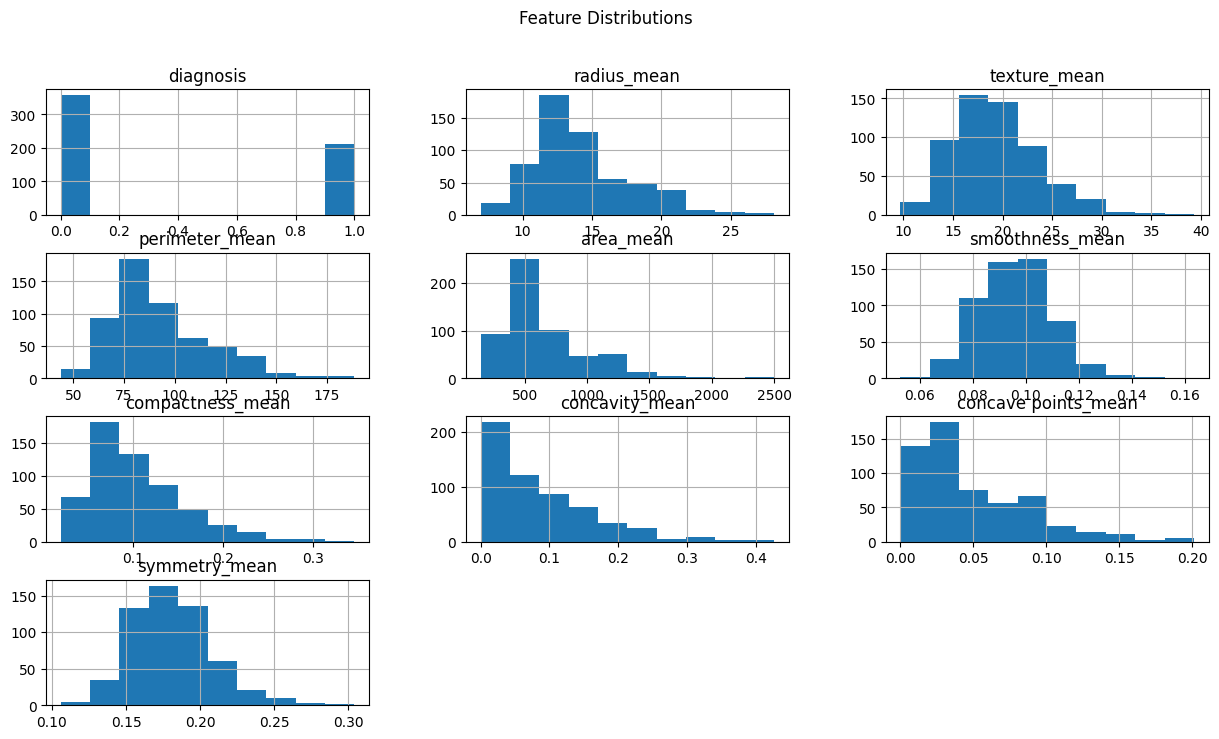

In [180]:
df.iloc[:, :10].hist(figsize=(15,8))
plt.suptitle("Feature Distributions ")
plt.show()

Correlation Analysis

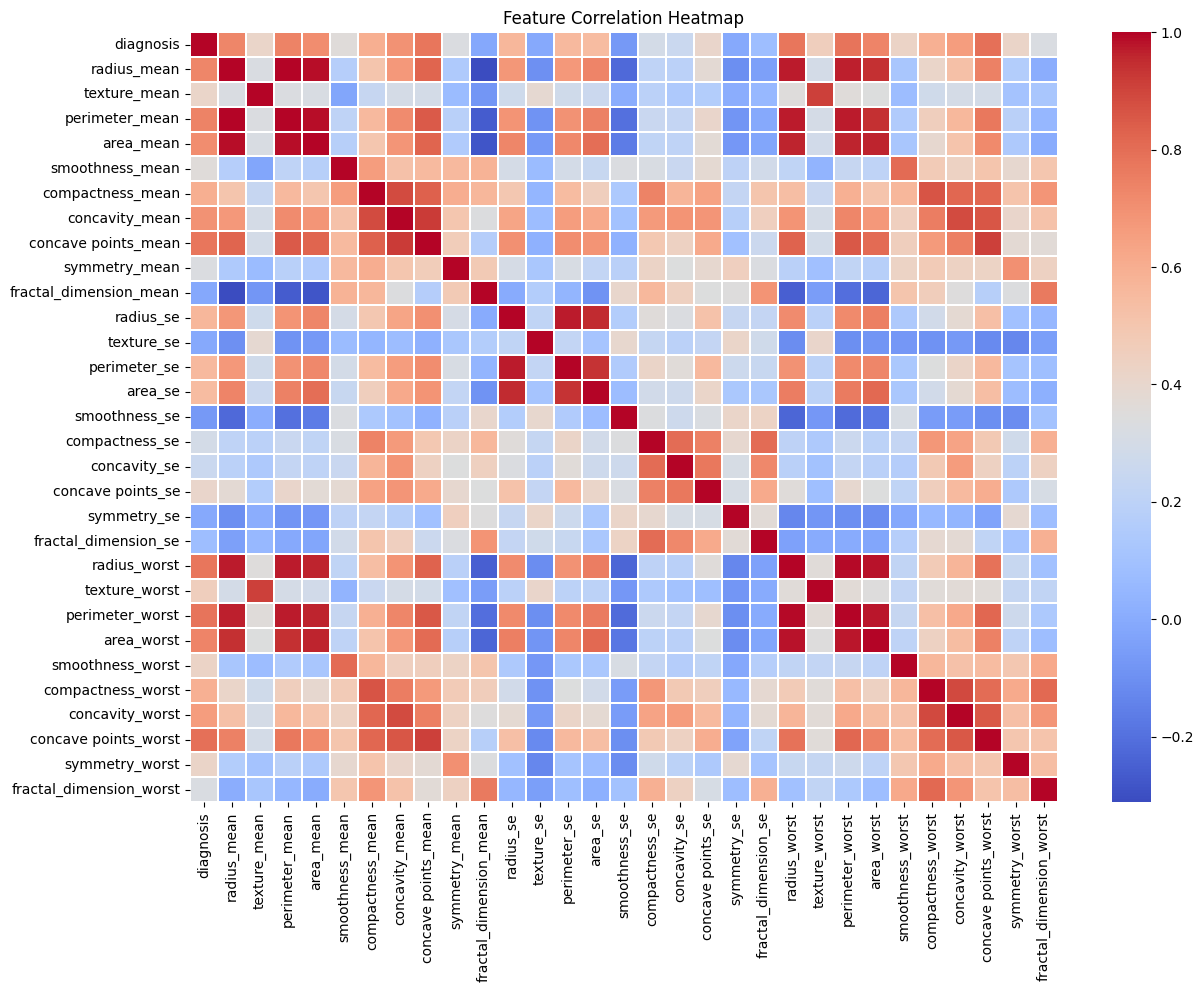

In [181]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.3)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Standardization and Train-test-split

In [182]:
def standardize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0) + 1e-8
    return (X - mean) / std

X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values


def train_test_split_scratch(X, y, test_size=0.2):
    idx = np.random.permutation(len(X))
    test_len = int(len(X) * test_size)
    return X[idx[test_len:]], X[idx[:test_len]], y[idx[test_len:]], y[idx[:test_len]]

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

In [183]:
def metrics(y_true, y_pred):
    tp = np.sum((y_true==1)&(y_pred==1))
    tn = np.sum((y_true==0)&(y_pred==0))
    fp = np.sum((y_true==0)&(y_pred==1))
    fn = np.sum((y_true==1)&(y_pred==0))

    acc = (tp+tn)/len(y_true)
    prec = tp/(tp+fp+1e-8)
    rec = tp/(tp+fn+1e-8)
    f1 = 2*prec*rec/(prec+rec+1e-8)
    return acc, prec, rec, f1

# Baseline Models (Without dimensionality reduction)

Logistic Regression

In [184]:
class LogisticScratch:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        z = np.clip(z,-500,500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for _ in range(self.epochs):
            y_hat = self.sigmoid(np.dot(X, self.w) + self.b)
            self.w -= self.lr*np.dot(X.T, (y_hat-y))/len(y)
            self.b -= self.lr*np.mean(y_hat-y)

    def predict(self, X):
        return (self.sigmoid(np.dot(X,self.w)+self.b)>=0.5).astype(int)

K-Nearest Neighbours

In [185]:
class KNNScratch:
    def __init__(self, k=7):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        preds=[]
        for x in X:
            dist = np.linalg.norm(self.X-x, axis=1)
            idx = np.argsort(dist)[:self.k]
            preds.append(np.bincount(self.y[idx]).argmax())
        return np.array(preds)

Naive-bayes 

In [186]:
class NaiveBayesScratch:
    def fit(self, X, y):
        self.cls = np.unique(y)
        self.mean = {c:X[y==c].mean(axis=0) for c in self.cls}
        self.var = {c:X[y==c].var(axis=0)+1e-6 for c in self.cls}
        self.prior = {c:len(X[y==c])/len(X) for c in self.cls}

    def predict(self, X):
        preds=[]
        for x in X:
            scores=[]
            for c in self.cls:
                prob = np.sum(-0.5*np.log(2*np.pi*self.var[c]) - ((x-self.mean[c])**2)/(2*self.var[c]))
                scores.append(np.log(self.prior[c])+prob)
            preds.append(self.cls[np.argmax(scores)])
        return np.array(preds)

Baseline Models' Evaluation

Logistic
Accuracy : 0.9027
Precision: 0.8889
Recall   : 0.8205
F1-score : 0.8533


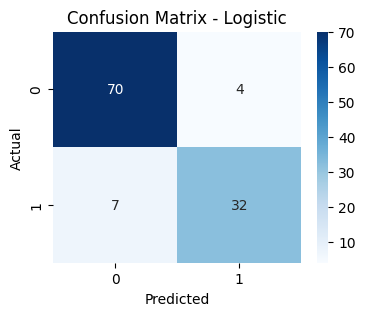

----------------------------------------
KNN
Accuracy : 0.9204
Precision: 0.8947
Recall   : 0.8718
F1-score : 0.8831


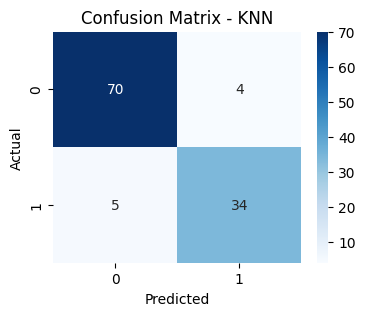

----------------------------------------
Naive Bayes
Accuracy : 0.9558
Precision: 0.9474
Recall   : 0.9231
F1-score : 0.9351


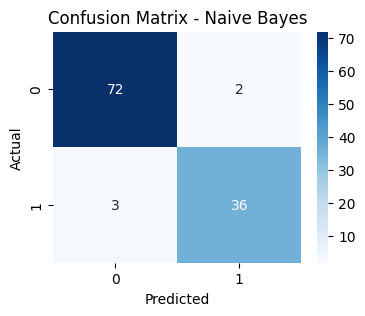

----------------------------------------


In [187]:
from sklearn.metrics import confusion_matrix

scratch_models = {
    "Logistic": LogisticScratch(),
    "KNN": KNNScratch(),
    "Naive Bayes": NaiveBayesScratch()
}

for name, model in scratch_models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc, prec, rec, f1 = metrics(y_test, preds)

    print(name)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 40)


# Using PCA on model

In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"\nPCA reduced features from {X_train.shape[1]} → {X_train_pca.shape[1]}")



PCA reduced features from 30 → 15


# PCA on Logistic Regression Model

In [189]:

print("\nLogistic Regression WITH PCA")
log_pca = LogisticScratch()
log_pca.fit(X_train_pca, y_train)
preds = log_pca.predict(X_test_pca)
acc, p, r, f1 = metrics(y_test, preds)
print(f"Acc:{acc:.3f} Prec:{p:.3f} Rec:{r:.3f} F1:{f1:.3f}")


Logistic Regression WITH PCA
Acc:0.956 Prec:0.905 Rec:0.974 F1:0.938


# Applying Advanced Models

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import shap

advanced_models = {
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True))]),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

scores = {}
for name, model in advanced_models.items():
    model.fit(X_train, y_train)
    prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, prob)
    scores[name] = auc
    print(f"{name} ROC-AUC: {auc:.4f}")

best_model_name = max(scores, key=scores.get)
best_model = advanced_models[best_model_name]
print("-" * 40)

for name, model in advanced_models.items():
    y_pred = model.predict(X_test)
    acc, prec, rec, f1 = metrics(y_test, y_pred)

    print(name)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("-" * 40)

print("\nBEST MODEL:", best_model_name)    

SVM ROC-AUC: 0.9962
Random Forest ROC-AUC: 0.9894
Gradient Boosting ROC-AUC: 0.9896
----------------------------------------
SVM
Accuracy : 0.9735
Precision: 0.9737
Recall   : 0.9487
F1-score : 0.9610
----------------------------------------
Random Forest
Accuracy : 0.9646
Precision: 0.9487
Recall   : 0.9487
F1-score : 0.9487
----------------------------------------
Gradient Boosting
Accuracy : 0.9469
Precision: 0.9231
Recall   : 0.9231
F1-score : 0.9231
----------------------------------------

BEST MODEL: SVM


SVM
Accuracy : 0.9735
Precision: 0.9737
Recall   : 0.9487
F1-score : 0.9610


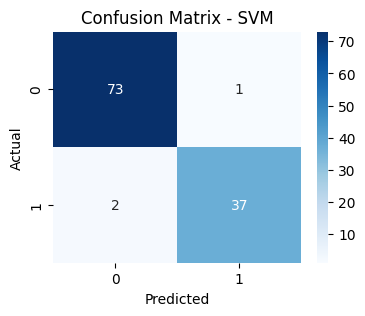

----------------------------------------
Random Forest
Accuracy : 0.9646
Precision: 0.9487
Recall   : 0.9487
F1-score : 0.9487


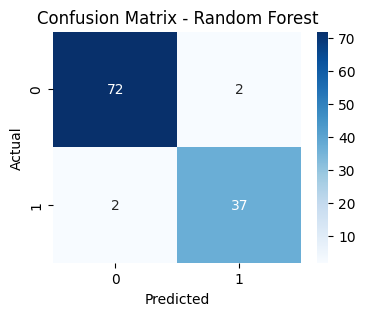

----------------------------------------
Gradient Boosting
Accuracy : 0.9469
Precision: 0.9231
Recall   : 0.9231
F1-score : 0.9231


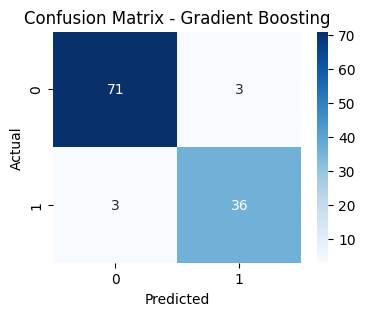

----------------------------------------


In [191]:
from sklearn.metrics import confusion_matrix

advanced_models = {
    "SVM": Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True))]),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in advanced_models.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    acc, prec, rec, f1 = metrics(y_test, y_preds)

    print(name)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    cm = confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("-" * 40)
